# Distributions

In [2]:
%config InlineBackend.figure_format ='retina'

In [3]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
%config InlineBackend.figure_format ='retina'
sns.set(style="whitegrid")

In [5]:
data = yf.download('^SPX', interval='1wk')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-02,16.660000,17.090000,16.660000,17.090000,17.090000,9040000
1950-01-09,17.080000,17.090000,16.650000,16.650000,16.650000,14790000
1950-01-16,16.719999,16.940001,16.719999,16.940001,16.940001,7980000
1950-01-23,16.920000,16.920000,16.730000,16.900000,16.900000,7430000
1950-01-30,17.020000,17.350000,17.020000,17.350000,17.350000,10120000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,4758.859863,4793.299805,4751.990234,4769.830078,4769.830078,11087280000
2024-01-01,4745.200195,4754.330078,4682.109863,4697.240234,4697.240234,15253660000
2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000
2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000
2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000


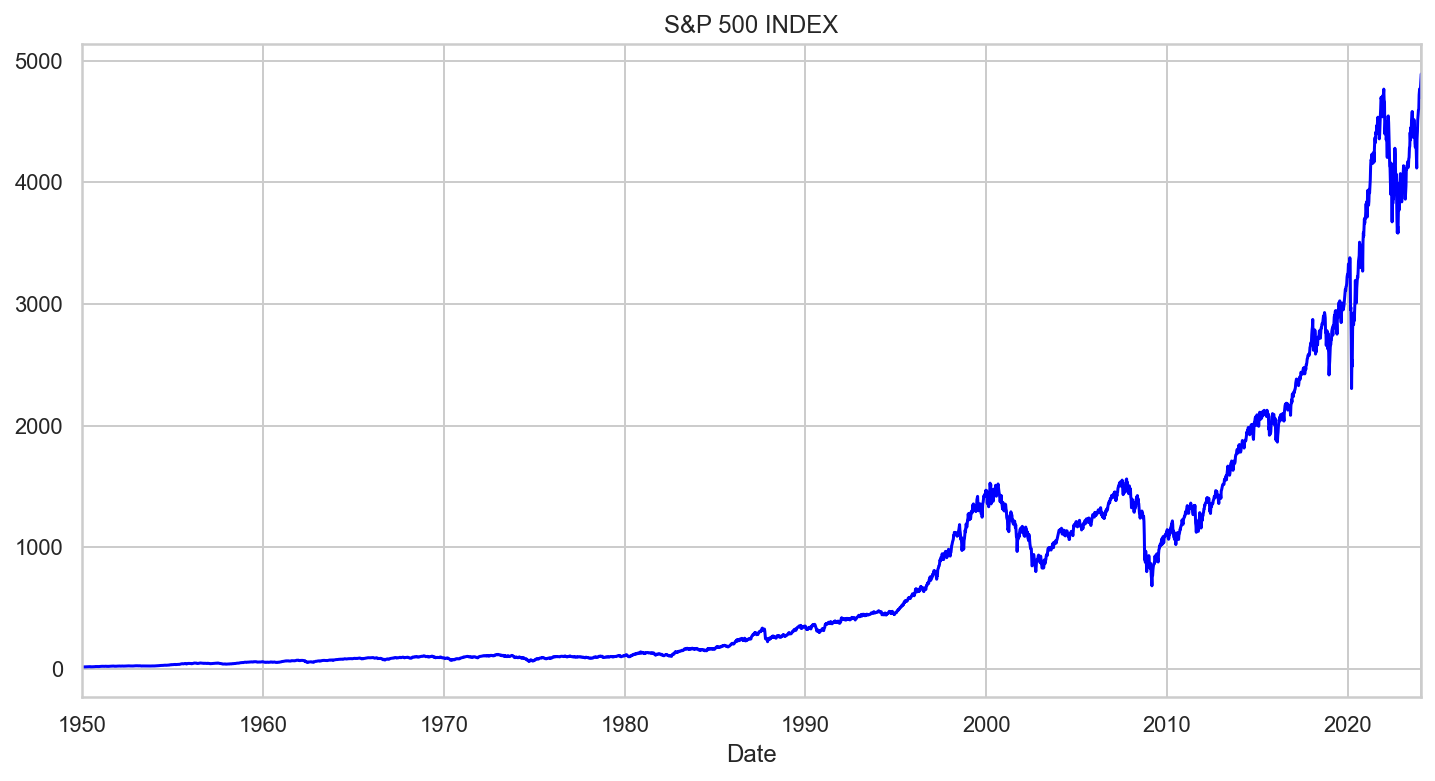

In [7]:
plt.figure(figsize=(12, 6))
data['Close'].plot(color='blue', title="S&P 500 INDEX")
plt.show()

In [8]:
from datetime import datetime
import numpy as np
from scipy.stats import kurtosis, skew

kind = 'standard'

df = data

if kind == 'standard':
    column = 'Returns'
    df.loc[:, column] = 100*(df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close']

elif kind == 'log':

    column = 'Log-Returns'
    df.loc[:, column] = np.log(df['Adj Close']) - \
        np.log(df['Adj Close'].shift(1))

df = df.reset_index()
df['year'] = df['Date'].dt.year
df['Decade'] = [int(np.floor(year/10) * 10) for year in np.array(df["year"])]
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
1,1950-01-09,17.080000,17.090000,16.650000,16.650000,16.650000,14790000,-2.642646,1950,1950
2,1950-01-16,16.719999,16.940001,16.719999,16.940001,16.940001,7980000,1.711930,1950,1950
3,1950-01-23,16.920000,16.920000,16.730000,16.900000,16.900000,7430000,-0.236692,1950,1950
4,1950-01-30,17.020000,17.350000,17.020000,17.350000,17.350000,10120000,2.593664,1950,1950
5,1950-02-06,17.320000,17.320000,17.209999,17.209999,17.209999,8750000,-0.813488,1950,1950


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
3860,2023-12-25,4758.859863,4793.299805,4751.990234,4769.830078,4769.830078,11087280000,0.318674,2023,2020
3861,2024-01-01,4745.200195,4754.330078,4682.109863,4697.240234,4697.240234,15253660000,-1.545372,2024,2020
3862,2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000,1.810053,2024,2020
3863,2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000,1.156657,2024,2020
3864,2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000,1.046012,2024,2020


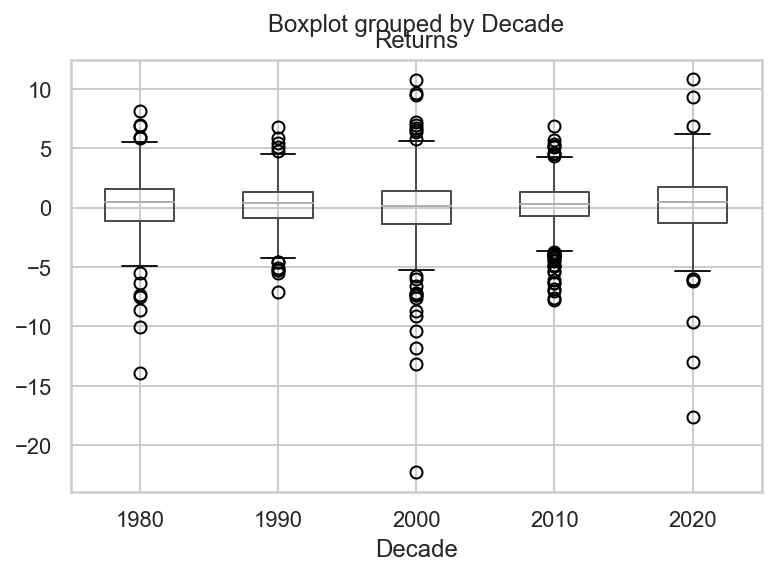

In [10]:
dta = df[df.Decade >= 1980]
dta.boxplot(by='Decade', column='Returns')
plt.show()

In [11]:
import plotly.graph_objects as go
import plotly.express as px 

dta = df[df.Decade >= 1990]


# fig = go.Figure()

# for decade in dta.Decade.unique():
    # subdata = dta[dta.Decade == decade]

fig = px.box(data_frame=dta, y='Returns',  color='Decade', hover_data={'Date': True, 'Returns': ':.2f', 'High': ':.2f', 'Decade':False},
                x='Decade', notched=True, color_discrete_sequence=px.colors.qualitative.Pastel
                        # boxpoints='suspectedoutliers',  # only suspected outliers
                        )
fig.update_layout(
    title='SP Returns',
    autosize=False,
    width=1200,
    height=800,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        # gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    # plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_layout(template="plotly_white")
                  
fig.show()